## Carregamento dos Dados e Importação das Bibliotecas

Nesta seção, carregamos o dataset de voos domésticos dos EUA em 2013 e importamos as bibliotecas necessárias para análise de grafos e manipulação de dados.


In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os dados
flights = pd.read_csv('flights.csv')

# Visualizar as primeiras linhas do dataframe
flights.head()


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


## Representação das Ligações em um Grafo

Representei as ligações entre aeroportos em um grafo, onde os vértices são os aeroportos e as arestas são a força das ligações, que depende exclusivamente do número de ligações.

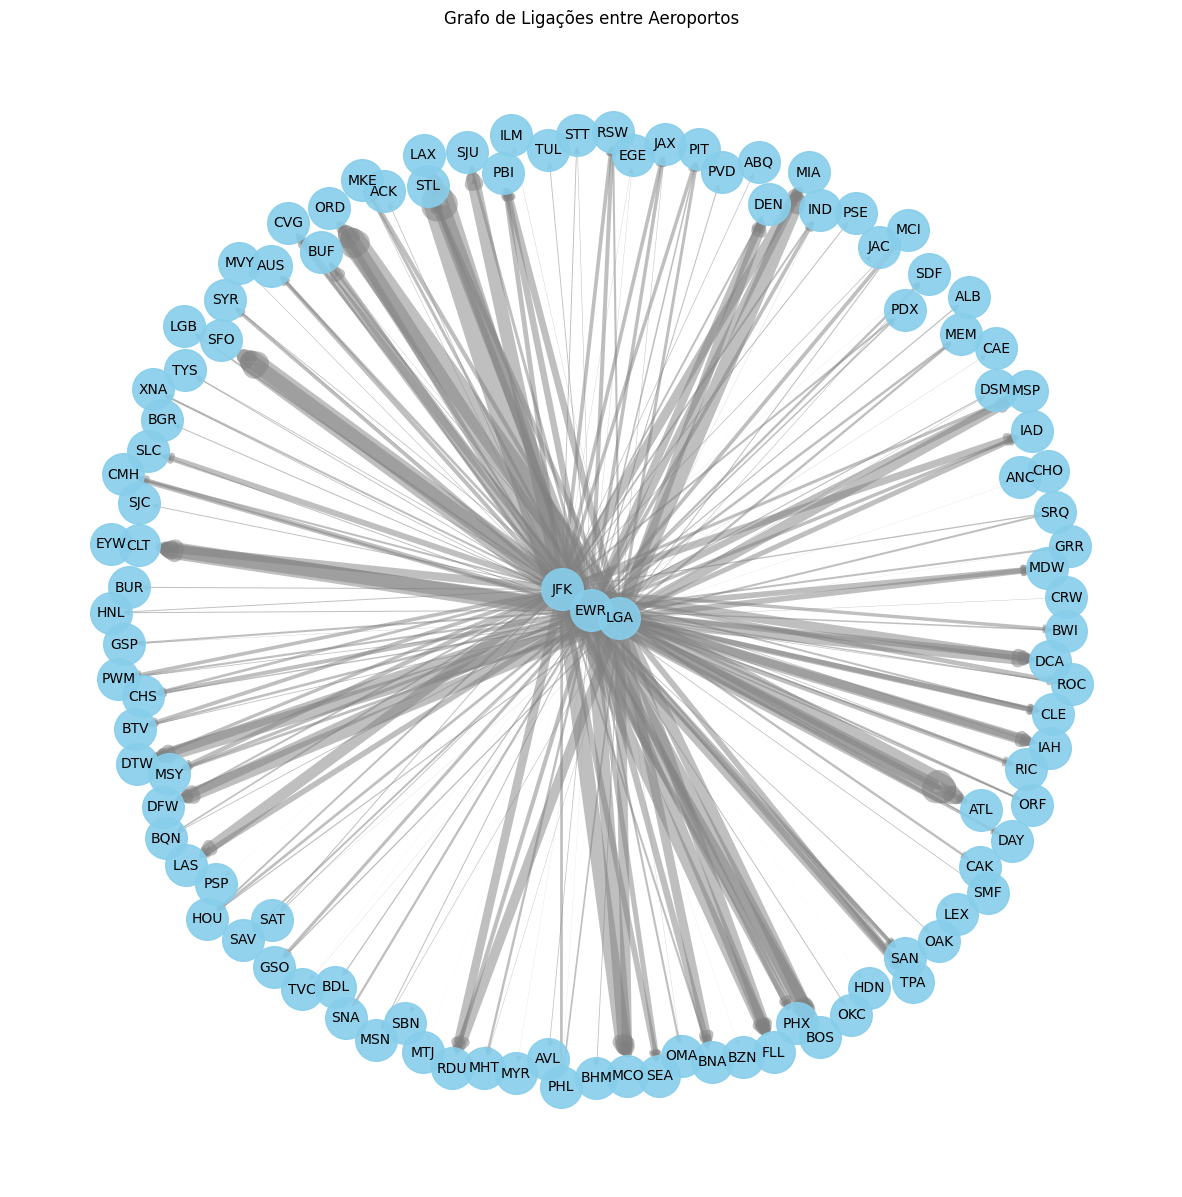

In [73]:

# Calcular o número de ligações entre aeroportos
flight_counts = flights.groupby(['origin', 'dest']).size().reset_index(name='num_flights')

# Criar um grafo ponderado
G = nx.DiGraph()

# Adicionar arestas ao grafo com base no número de ligações
for _, row in flight_counts.iterrows():
    G.add_edge(row['origin'], row['dest'], weight=row['num_flights'])

# Desenhar o grafo com ajustes para melhorar a legibilidade
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.25, iterations=100)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Desenhar arestas com peso representado pela largura
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=[weight/500 for weight in weights])

# Desenhar nós com tamanho ajustado e cor diferente
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="skyblue", alpha=0.9)

# Desenhar rótulos dos nós
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_family="sans-serif")

plt.title('Grafo de Ligações entre Aeroportos')
plt.axis('off')
plt.show()


## Estudo dos Atrasos das Companhias Aéreas

Analisei os atrasos dos voos para diferentes companhias aéreas e geramos um ranking das companhias que mais se atrasam.


In [29]:
# Calcular o atraso médio por companhia aérea
airline_delays = flights.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False).reset_index()

# Adicionar o nome da companhia aérea para melhor legibilidade
airlines = flights[['carrier', 'name']].drop_duplicates()
airline_delays = airline_delays.merge(airlines, on='carrier')

# Exibir o ranking das companhias aéreas com maiores atrasos
airline_delays


,carrier,arr_delay,name
0,F9,21.920705,Frontier Airlines Inc.
1,FL,20.115906,AirTran Airways Corporation
2,EV,15.796431,ExpressJet Airlines Inc.
3,YV,15.556985,Mesa Airlines Inc.
4,OO,11.931034,SkyWest Airlines Inc.
5,MQ,10.774733,Envoy Air
6,WN,9.649120,Southwest Airlines Co.
7,B6,9.457973,JetBlue Airways
8,9E,7.379669,Endeavor Air Inc.
9,UA,3.558011,United Air Lines Inc.


## Representação Gráfica das Ligações mais Críticas em Termos de Atraso

Representei as ligações mais críticas em termos de atraso entre os diferentes aeroportos.


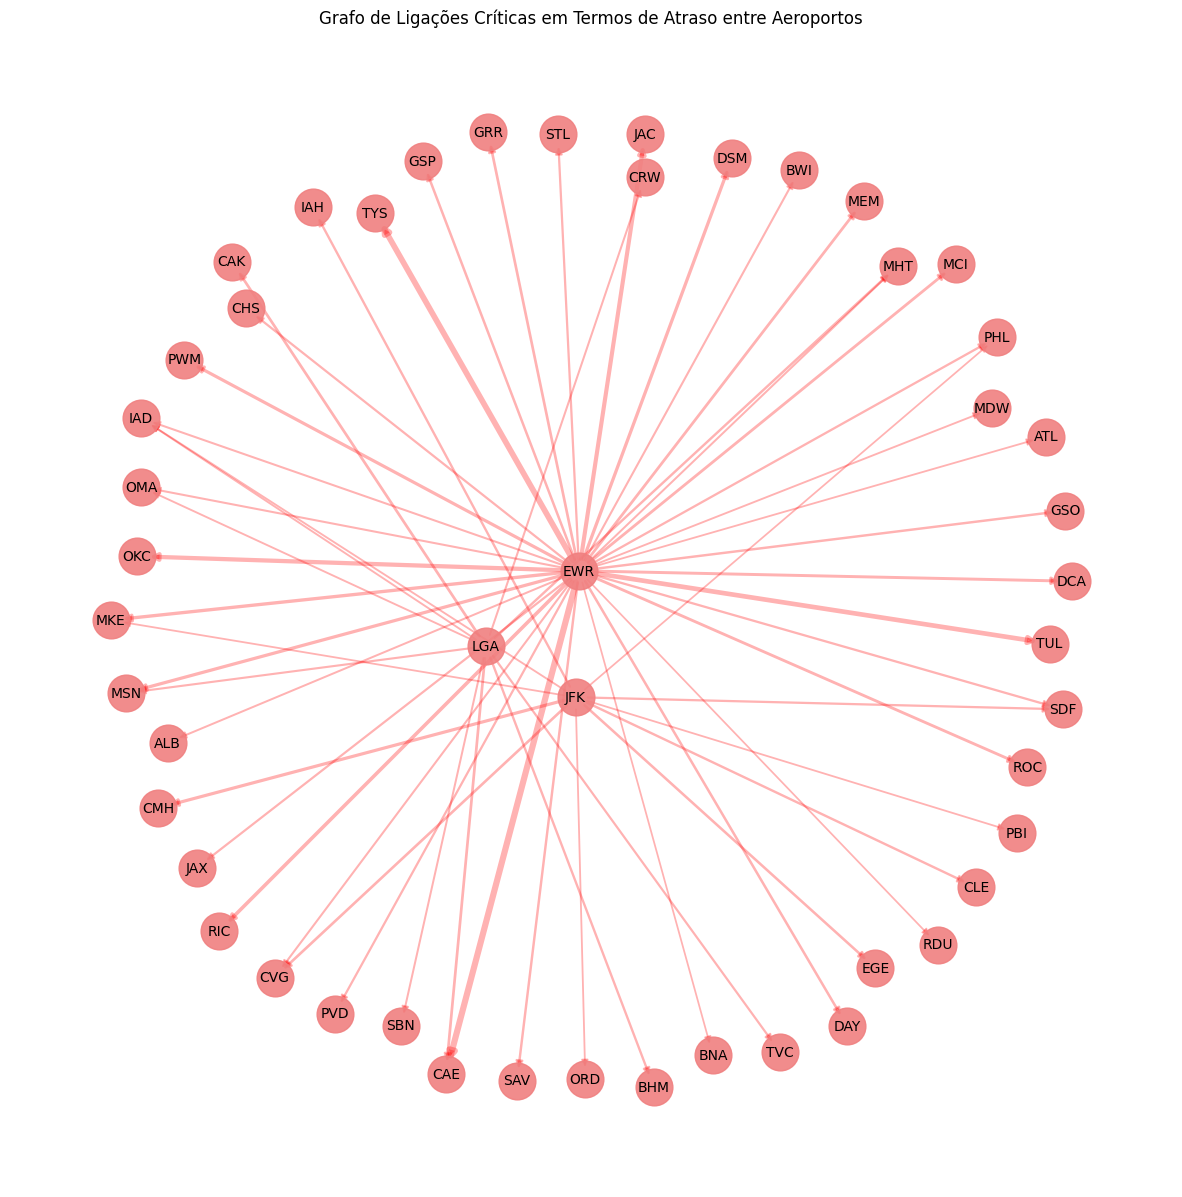

In [30]:
# Calcular o atraso médio entre pares de aeroportos
airport_delays = flights.groupby(['origin', 'dest'])['arr_delay'].mean().reset_index()

# Filtrar as ligações com maiores atrasos (quartil superior)
critical_links = airport_delays[airport_delays['arr_delay'] > airport_delays['arr_delay'].quantile(0.75)]

# Criar um grafo para as ligações críticas
G_critical = nx.DiGraph()

# Adicionar arestas ao grafo crítico com base no atraso médio
for _, row in critical_links.iterrows():
    G_critical.add_edge(row['origin'], row['dest'], weight=row['arr_delay'])

# Desenhar o grafo crítico
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_critical, k=0.5, iterations=100)
edges = G_critical.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Desenhar arestas com peso representado pela largura
nx.draw_networkx_edges(G_critical, pos, alpha=0.3, edge_color='red', width=[weight/10 for weight in weights])

# Desenhar nós com tamanho ajustado e cor diferente
nx.draw_networkx_nodes(G_critical, pos, node_size=700, node_color="lightcoral", alpha=0.9)

# Desenhar rótulos dos nós
nx.draw_networkx_labels(G_critical, pos, font_size=10, font_color="black", font_family="sans-serif")

plt.title('Grafo de Ligações Críticas em Termos de Atraso entre Aeroportos')
plt.axis('off')
plt.show()


## Mapa interactivo dos grafos 

In [82]:
import pandas as pd
import networkx as nx
import gravis as gv

# Carregar os dados
flights = pd.read_csv('flights.csv')

# Calcular o número de ligações entre aeroportos
flight_counts = flights.groupby(['origin', 'dest']).size().reset_index(name='num_flights')

# Criar um grafo ponderado
G = nx.DiGraph()

# Adicionar arestas ao grafo com base no número de ligações
for _, row in flight_counts.iterrows():
    G.add_edge(row['origin'], row['dest'], weight=row['num_flights'])

# Criar uma visualização interativa usando Gravis
gravis_graph = gv.d3(G)

# Exibir a visualização interativa no Jupyter Notebook
gravis_graph.display()


## Estudo das Causas dos Atrasos na Chegada

Analisei possíveis causas para os atrasos na chegada, considerando fatores como a velocidade média do voo.


In [31]:
# Calcular a velocidade média do voo
flights['speed'] = flights['distance'] / (flights['air_time'] / 60)

# Analisar a correlação entre velocidade média e atraso na chegada
correlation = flights[['speed', 'arr_delay']].corr()

# Exibir a correlação
correlation


,speed,arr_delay
speed,1.000000,-0.135189
arr_delay,-0.135189,1.000000


## Algoritmos de Centralidade e Deteção de Comunidades

Explorei algoritmos de centralidade e deteção de comunidades no grafo das ligações entre aeroportos.


In [41]:
from networkx.algorithms.community import greedy_modularity_communities

# Calcular a centralidade de grau
degree_centrality = nx.degree_centrality(G)

# Ordenar os aeroportos pela centralidade de grau e selecionar o top 5
top_5_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Exibir a centralidade de grau para o top 5 aeroportos
print("Top 5 Aeroportos por Centralidade de Grau:")
for airport, centrality in top_5_degree_centrality:
    print(f"{airport}: {centrality:.4f}")

# Detectar comunidades usando o algoritmo de modularidade de greedy
communities = greedy_modularity_communities(G)

# Exibir as comunidades identificadas
print("\nComunidades de Aeroportos:")
for i, community in enumerate(communities):
    print(f"Comunidade {i+1}: {sorted(community)}")

Top 5 Aeroportos por Centralidade de Grau:
EWR: 0.8113
JFK: 0.6604
LGA: 0.6509
IAH: 0.0283
MIA: 0.0283

Comunidades de Aeroportos:
Comunidade 1: ['ATL', 'AVL', 'BGR', 'BHM', 'BNA', 'BOS', 'BTV', 'BUF', 'BWI', 'CAE', 'CAK', 'CHO', 'CHS', 'CLE', 'CLT', 'CMH', 'CRW', 'CVG', 'DAY', 'DCA', 'DEN', 'DFW', 'DSM', 'DTW', 'EYW', 'FLL', 'GRR', 'GSO', 'GSP', 'HOU', 'IAD', 'IAH', 'ILM', 'IND', 'JAX', 'LEX', 'LGA', 'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSN', 'MSP', 'MSY', 'MYR', 'OMA', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT', 'PWM', 'RDU', 'RIC', 'ROC', 'RSW', 'SAV', 'SBN', 'SDF', 'SRQ', 'STL', 'SYR', 'TPA', 'TVC', 'TYS', 'XNA']
Comunidade 2: ['ABQ', 'ACK', 'AUS', 'BQN', 'BUR', 'EGE', 'HNL', 'JAC', 'JFK', 'LAS', 'LAX', 'LGB', 'MVY', 'OAK', 'PDX', 'PHX', 'PSE', 'PSP', 'SAN', 'SAT', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'STT']
Comunidade 3: ['ALB', 'ANC', 'BDL', 'BZN', 'EWR', 'HDN', 'MTJ', 'OKC', 'PVD', 'SNA', 'TUL']
